# Exploring Video Games

- Dataset: Video Games Sales Dataset , size: 55,000 (as of April 2019) , source: Scraped from vgchartz.com
- Content: Game details: Name, Platform, Genre, ESRB Rating

- Sales figures: Total Shipped copies, Global Sales (worldwide), Sales figures for North America (NA_Sales), Europe (PAL_Sales), Japan (JP_Sales), and Other regions

- Review scores: Critic Score (from 10), User Score (from 10)

- Release Year

- Necessary Libraries: Pandas, Matplotlib and Seaborn to uncover insights from the given data.



# Importing Necessary libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer


# Get Dataset (Read csv file)

In [80]:
VGS_data= pd.read_csv(r'C:/Users/Christiana/Desktop/BYCT-Data Science Challenge/vgsales-12-4-2019.csv')

In [81]:
VGS_data.head(10)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


# Step1:Data Cleaning

1. Get basic information about the data using df.info().

2. Describe the numerical columns using df.describe().

3. Identify and handle missing values (e.g., dropping rows, imputing      values).

In [82]:
VGS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [83]:
VGS_data.describe()

,Rank,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore
count,55792.000000,0.0,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,799.000000
mean,27896.500000,NaN,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,7.425907
std,16105.907446,NaN,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,1.384226
min,1.000000,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,2.600000
25%,13948.750000,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,6.800000
50%,27896.500000,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,7.800000
75%,41844.250000,NaN,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,8.500000
max,55792.000000,NaN,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,9.600000


In [84]:
VGS_data.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')


- Drop columns, Replace Missing and Remove duplicates

In [85]:
# Drop columns not need for analysis
VGS_data.drop(['img_url',"url"], axis=1, inplace=True)
VGS_data.head(5)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,1,NaN
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,1,NaN
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,1,8.7
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1,NaN
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,1,8.8


- Checking for missing values and replacing them with NaN values

In [86]:
VGS_data.isnull().sum().sum()# check the total number of missing values in the dataset

560061

In [87]:
missing_data = VGS_data.isnull()
missing_data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore
0,False,False,False,False,False,False,False,False,True,False,...,False,True,True,True,True,True,False,True,False,True
1,False,False,False,False,True,False,False,False,True,False,...,False,True,True,True,True,True,False,True,False,True
2,False,False,False,False,False,False,False,False,True,False,...,False,True,True,True,True,True,False,False,False,False
3,False,False,False,False,True,False,False,False,True,True,...,False,True,True,True,True,True,False,False,False,True
4,False,False,False,False,False,False,False,False,True,False,...,False,True,True,True,True,True,False,True,False,False


In [88]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Rank
False    55792
Name: Rank, dtype: int64

Name
False    55792
Name: Name, dtype: int64

basename
False    55792
Name: basename, dtype: int64

Genre
False    55792
Name: Genre, dtype: int64

ESRB_Rating
True     32169
False    23623
Name: ESRB_Rating, dtype: int64

Platform
False    55792
Name: Platform, dtype: int64

Publisher
False    55792
Name: Publisher, dtype: int64

Developer
False    55775
True        17
Name: Developer, dtype: int64

VGChartz_Score
True    55792
Name: VGChartz_Score, dtype: int64

Critic_Score
True     49256
False     6536
Name: Critic_Score, dtype: int64

User_Score
True     55457
False      335
Name: User_Score, dtype: int64

Total_Shipped
True     53965
False     1827
Name: Total_Shipped, dtype: int64

Global_Sales
True     36377
False    19415
Name: Global_Sales, dtype: int64

NA_Sales
True     42828
False    12964
Name: NA_Sales, dtype: int64

PAL_Sales
True     42603
False    13189
Name: PAL_Sales, dtype: int64

JP_Sales
True     48749
False     7043


In [89]:
VGS_data.replace(' ',np.nan, inplace=True)# Replace empty strings (" ") with NaNs
VGS_data.head(15)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,1,NaN
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,1,NaN
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,1,8.7
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1,NaN
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,1,8.8
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,31.38,NaN,NaN,NaN,NaN,NaN,1998.0,NaN,1,NaN
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,30.80,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,1,NaN
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,30.26,NaN,NaN,NaN,NaN,NaN,1989.0,NaN,1,NaN
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,30.22,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,1,9.1
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,30.01,NaN,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,1,NaN


# Filling NaN values with median values 
- reason because Median are less sensitive to outliers

In [90]:
median_critic_score = VGS_data['Critic_Score'].median()
median_user_score = VGS_data['User_Score'].median()
median_Total_Shipped = VGS_data['Total_Shipped'].median()
median_Global_Sales = VGS_data['Global_Sales'].median()
median_NA_Sales = VGS_data['NA_Sales'].median()
median_PAL_Sales = VGS_data['PAL_Sales'].median()
median_JP_Sales = VGS_data['JP_Sales'].median()
median_Other_Sales = VGS_data['Other_Sales'].median()
median_Vgchartzscore = VGS_data['Vgchartzscore'].median()
print('Median scores: ',median_critic_score,median_user_score,median_Total_Shipped,
      median_Global_Sales,median_NA_Sales,median_PAL_Sales,median_JP_Sales,median_Other_Sales,median_Vgchartzscore)

Median scores:  7.5 8.5 0.59 0.12 0.12 0.04 0.05 0.01 7.8


In [91]:
#Fill NaN with column means
VGS_data['Critic_Score'].fillna(value=median_critic_score, inplace=True) 
VGS_data['User_Score'].fillna(value=median_user_score, inplace=True)
VGS_data['Total_Shipped'].fillna(value=median_Total_Shipped, inplace=True)
VGS_data['Global_Sales'].fillna(value=median_Global_Sales, inplace=True)
VGS_data['NA_Sales'].fillna(value=median_NA_Sales, inplace=True)
VGS_data['PAL_Sales'].fillna(value=median_PAL_Sales, inplace=True)
VGS_data['JP_Sales'].fillna(value=median_JP_Sales, inplace=True)
VGS_data['Other_Sales'].fillna(value=median_Other_Sales, inplace=True)
VGS_data['Vgchartzscore'].fillna(value=median_Vgchartzscore, inplace=True)
VGS_data

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,82.86,0.12,0.12,0.04,0.05,0.01,2006.0,NaN,1,7.8
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,40.24,0.12,0.12,0.04,0.05,0.01,1985.0,NaN,1,7.8
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,37.14,0.12,0.12,0.04,0.05,0.01,2008.0,11th Apr 18,1,8.7
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,7.5,...,36.60,0.12,0.12,0.04,0.05,0.01,2017.0,13th Nov 18,1,7.8
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,33.09,0.12,0.12,0.04,0.05,0.01,2009.0,NaN,1,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,2019.0,11th Apr 19,1,7.8
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,2019.0,11th Apr 19,1,7.8
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,2019.0,11th Apr 19,1,7.8
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,2019.0,11th Apr 19,1,7.8


# Learnt a new technique (KNN Imputer)
- KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median.

In [92]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed

# Fit and transform the data
VGS_data_imputed = imputer.fit_transform(VGS_data[['Critic_Score', 'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales','JP_Sales','Other_Sales', 'Vgchartzscore']])

# Convert back to DataFrame
VGS_data_imputed = pd.DataFrame(VGS_data_imputed, columns=[['Critic_Score', 'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales','JP_Sales','Other_Sales', 'Vgchartzscore']])
VGS_data_imputed

,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Vgchartzscore
0,7.7,8.5,82.86,0.12,0.12,0.04,0.05,0.01,7.8
1,10.0,8.5,40.24,0.12,0.12,0.04,0.05,0.01,7.8
2,8.2,9.1,37.14,0.12,0.12,0.04,0.05,0.01,8.7
3,7.5,8.5,36.60,0.12,0.12,0.04,0.05,0.01,7.8
4,8.0,8.8,33.09,0.12,0.12,0.04,0.05,0.01,8.8
...,...,...,...,...,...,...,...,...,...
55787,7.5,8.5,0.59,0.12,0.12,0.04,0.05,0.01,7.8
55788,7.5,8.5,0.59,0.12,0.12,0.04,0.05,0.01,7.8
55789,7.5,8.5,0.59,0.12,0.12,0.04,0.05,0.01,7.8
55790,7.5,8.5,0.59,0.12,0.12,0.04,0.05,0.01,7.8


=> Checking and removing duplicates

In [93]:
VGS_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
55787    False
55788    False
55789    False
55790    False
55791    False
Length: 55792, dtype: bool

# Visualize data distribution:
Create histograms or density plots for key numerical columns like "Critic Score," "User Score," and "Global_Sales" using matplotlib or seaborn.

- Density Plots: A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable (see more). It is a smoothed version of the histogram and is used in the same concept.it visualises the distribution of data over a continuous interval or time period.

- Histogram:A histogram is a graph that shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears).

Using Matplotlib and Seaborn to achieve visuals

Text(0.5, 0, 'Critic Score')

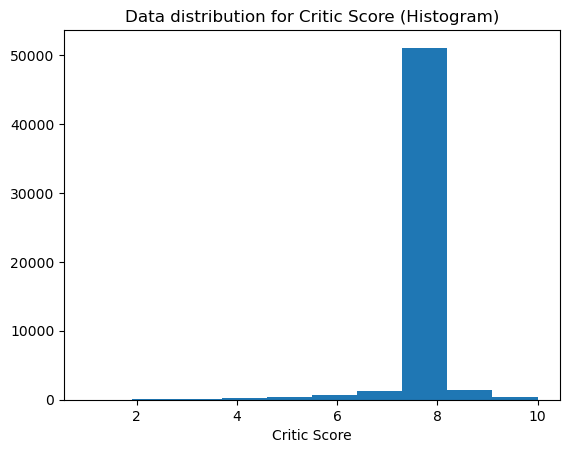

In [94]:
ax=plt.hist(data=VGS_data, x='Critic_Score')

plt.title("Data distribution for Critic Score (Histogram)")
plt.xlabel('Critic Score')


Text(0.5, 0, 'User Score')

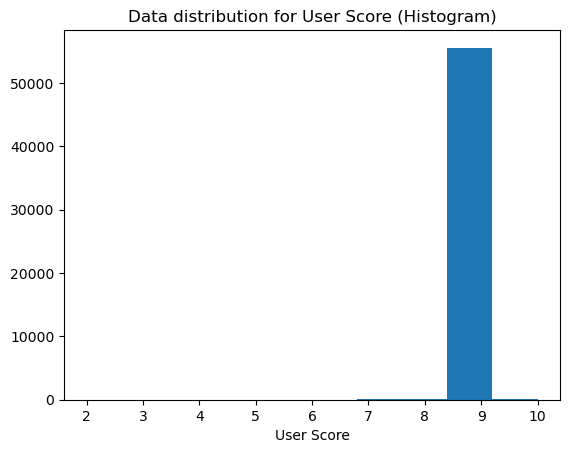

In [95]:
ax=plt.hist(data=VGS_data, x='User_Score')

plt.title("Data distribution for User Score (Histogram)")
plt.xlabel('User Score')

C:\Users\Christiana\AppData\Local\Temp\ipykernel_16172\4168732370.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Global Sales')

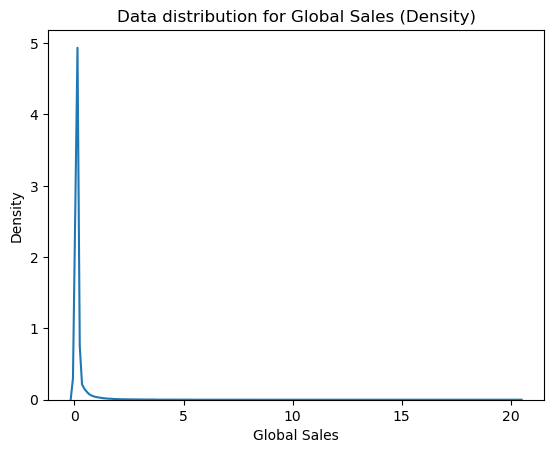

In [96]:
sb.distplot(a=VGS_data.Global_Sales, hist=False) #Density plot for Global Sales 

plt.title("Data distribution for Global Sales (Density)")
plt.xlabel('Global Sales')

Text(0.5, 0, 'Global Sales')

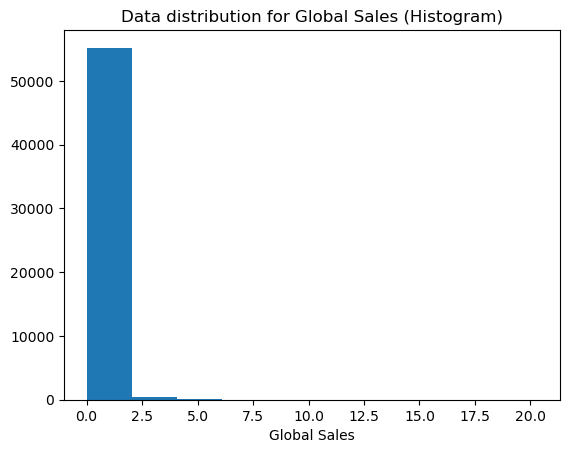

In [97]:
ax=plt.hist(data=VGS_data, x='Global_Sales')

plt.title("Data distribution for Global Sales (Histogram)")
plt.xlabel('Global Sales')


# Step 2: Grouping and Analysis
-Sorting, Grouping and analyse
-Hypothesis Testing
-Correlation
-LabelEncoding(if needed) and Normalization

1: Top Genres by Sales:

- Group the data by "Genre" and calculate the total global sales for each genre.

- Create a bar chart (using matplotlib or seaborn) to visualize the top-selling genres.

In [98]:
VGS_data.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'status',
       'Vgchartzscore'],
      dtype='object')

In [99]:
TGS = VGS_data.groupby('Genre')
TG_Sales= TGS['Global_Sales'].sum().reset_index()
TG_Sales['Global_Sales'] = TG_Sales['Global_Sales'].round(2)
TG_Sales

,Genre,Global_Sales
0,Action,1777.30
1,Action-Adventure,197.69
2,Adventure,752.37
3,Board Game,1.99
4,Education,1.41
5,Fighting,506.18
6,MMO,16.90
7,Misc,1461.72
8,Music,59.05
9,Party,11.27


Create a bar chart (using matplotlib or seaborn) to visualize the top-selling genres.

Text(0.5, 1.0, 'Top Selling Genres')

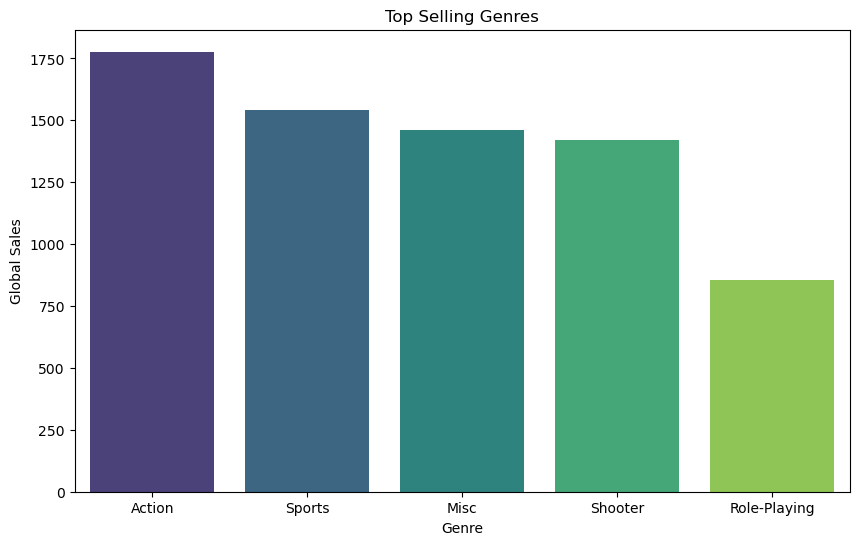

In [100]:
TG_Sales_sorted = TG_Sales.sort_values(by='Global_Sales', ascending=False).head(5)# Total Global Sales is sorted into 5 top selling genres in ascending order(highest to lowest)

plt.figure(figsize=(10, 6))# Fig Size(height and weight)i.e the outer border
sb.barplot(x='Genre', y='Global_Sales', data=TG_Sales_sorted, palette='viridis')#creates the Barchart and modifies the style  

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Top Selling Genres')
    

#2: Sales Over Time:

Group the data by "Year" and calculate the average "Global_Sales" for each year.

Create a line chart (using matplotlib or seaborn) to visualize the trend of global sales over time.



In [101]:
AVG_SOT = VGS_data.groupby('Year')['Global_Sales'].mean().reset_index()
AVG_SOT.head(5)

,Year,Global_Sales
0,1970.0,0.119615
1,1973.0,0.120000
2,1975.0,0.120000
3,1977.0,0.298333
4,1978.0,0.226458


In [102]:
# Group by 'Year' and calculate average global sales
AVG_SOT = VGS_data.groupby('Year')['Global_Sales'].mean().reset_index()

# Display the result
print(pd.concat([VGS_data, AVG_SOT], axis=1))

        Rank                           Name                      basename  \
0          1                     Wii Sports                    wii-sports   
1          2              Super Mario Bros.              super-mario-bros   
2          3                 Mario Kart Wii                mario-kart-wii   
3          4  PlayerUnknown's Battlegrounds  playerunknowns-battlegrounds   
4          5              Wii Sports Resort             wii-sports-resort   
...      ...                            ...                           ...   
55787  55788                    Indivisible                   indivisible   
55788  55789                     Lost Ember                    lost-amber   
55789  55790                     Lost Ember                    lost-amber   
55790  55791                     Lost Ember                    lost-amber   
55791  55792                     Falcon Age                    falcon-age   

                  Genre ESRB_Rating Platform         Publisher  \
0        

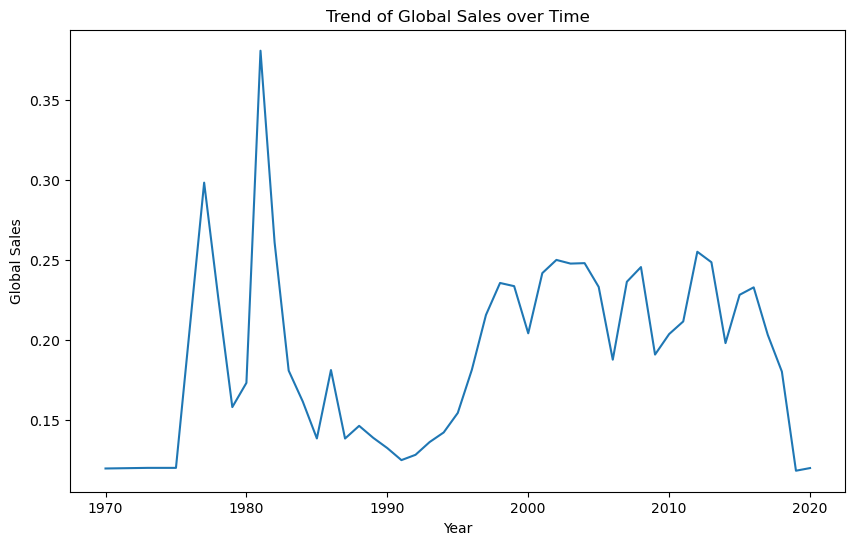

In [103]:
#Create a line chart (using matplotlib or seaborn) to visualize the trend of global sales over time.
plt.figure(figsize=(10, 6))  

sb.lineplot(data=AVG_SOT, x='Year', y='Global_Sales')

plt.title("Trend of Global Sales over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.show()

# Correlation:

Correlation between Scores and Sales:
1. Calculate the correlation coefficient between "Critic Score" and "Global_Sales" using pandas.
2. Discuss the interpretation of the correlation value.

In [104]:
 #Calculate the correlation coefficient between "Critic Score" and "Global_Sales"
corr_coef = VGS_data[['Critic_Score','Global_Sales']].corr()
corr_coef

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.118958
Global_Sales,0.118958,1.000000


In [105]:
corr_coef = VGS_data['Global_Sales'].corr(VGS_data['Critic_Score'])
print("Correlation Coefficient: ", corr_coef)

Correlation Coefficient:  0.1189575040781852


Analysis Observation: From the correlation table between "Critic Score" and "Global Sales"; 

Conclusion: I fail to reject the null hypothesis.
Since the p-value (0.1189575040781852) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. With a p-value of 0.1189575040781852, I accept that there is not enough evidence to support the claim that Critic Score is associated with Global Sales. 
In simpler terms, the observed data does not provide sufficient statistical evidence to conclude that there is a meaningful relationship between Critic Scores and Global Sales in the dataset analyzed.

(i.e The Null Hypotheseis which states that Critic Sore is not  associated with Global sales. with a P-value = 0.1189575040781852, which is greater than > 0.5).

# Set 3: Advanced Analysis and Visualization (Advanced) - Most Challenging
Platform Comparison:

- Analyze the sales performance of a specific genre across different platforms (e.g., PS4, XOne).
- Create a boxplot (using seaborn) to compare the distribution of "Global_Sales" for that genre across platforms.

In [122]:
#Conducted a value count to identify my target Genre
genre = VGS_data['Genre'].value_counts().nlargest(5)
genre

Misc         9476
Action       7667
Adventure    5293
Sports       5244
Shooter      4586
Name: Genre, dtype: int64

In [107]:
top_genres = VGS_data.sort_values(by='Global_Sales', ascending=False)['Genre'].head(5)

# Filtered data by genre and platform
filtered_data = VGS_data[VGS_data['Genre'].isin(top_genres)]

# Grouped data by Genre and Platform and calculate total sales
genre_platform_sales = filtered_data.groupby(['Genre', 'Platform'])['Global_Sales'].sum().reset_index()

# Analyzed sales performance of a specific genre across different platforms ('Action' genre)
Target_genre = 'Action'
genre_sales = genre_platform_sales[genre_platform_sales['Genre'] == Target_genre]
genre_sales_top10 = genre_sales.nlargest(10, 'Global_Sales')

# Print the results
print(f"Sales performance of {Target_genre} genre across 10 different platforms:")
print(f"Highest platform sale is: {genre_sales_top10.iloc[0]}")
genre_sales_top10

Sales performance of Action genre across 10 different platforms:
Highest platform sale is: Genre           Action
Platform           PS3
Global_Sales    223.02
Name: 39, dtype: object


,Genre,Platform,Global_Sales
39,Action,PS3,223.02
38,Action,PS2,204.29
55,Action,X360,173.80
40,Action,PS4,136.92
34,Action,PC,129.10
37,Action,PS,94.44
11,Action,DS,72.58
52,Action,Wii,68.61
58,Action,XOne,62.37
15,Action,GBA,61.45


In [108]:
set= VGS_data[VGS_data['Genre']=='Action']
set

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore
19,20,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,NaN,9.4,...,0.59,20.32,6.37,9.85,0.99,3.12,2013.0,NaN,1,7.8
20,21,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,NaN,9.7,...,0.59,19.39,6.06,9.71,0.60,3.02,2014.0,03rd Jan 18,1,7.8
26,27,Grand Theft Auto: San Andreas,grand-theft-auto-san-andreas,Action,M,PS2,Rockstar Games,Rockstar North,NaN,9.5,...,17.30,0.12,0.12,0.04,0.05,0.01,2004.0,NaN,1,7.8
30,31,Grand Theft Auto: Vice City,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,NaN,9.6,...,0.59,16.15,8.41,5.49,0.47,1.78,2002.0,NaN,1,7.8
32,33,Grand Theft Auto V,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,NaN,7.5,...,0.59,15.86,9.06,5.33,0.06,1.42,2013.0,NaN,1,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55769,55770,Zarvot,zarvot,Action,NaN,NS,Unknown,Snowhydra Games,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,NaN,14th Oct 18,1,6.0
55772,55773,ZERO GUNNER 2,zero-gunner-2,Action,NaN,NS,Zerodiv,ZeroDiv,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,2018.0,26th Mar 18,1,7.8
55773,55774,Zoids Wild: King of Blast,zoids-wild-king-of-blast,Action,NaN,NS,Takara Tomy,Takara Tomy,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,2019.0,24th Feb 19,1,7.8
55774,55775,Zombeer,zombeer,Action,M,WiiU,Unknown,Padaone Games,NaN,7.5,...,0.59,0.12,0.12,0.04,0.05,0.01,NaN,05th Jan 18,1,7.8


In [109]:
set.shape

(7667, 21)

In [110]:
set['Platform'].unique()


array(['PS3', 'PS4', 'PS2', 'X360', 'PC', 'XOne', 'PSP', 'PS', 'Wii',
       'DS', '3DS', 'NES', 'GC', 'WiiU', 'XB', 'N64', 'GEN', '2600',
       'GBA', 'GB', 'PSV', 'SNES', 'DC', 'NS', 'SAT', 'XBL', 'PSN', 'And',
       'DSiW', 'OSX', 'Lynx', 'SCD', 'Linux', 'MS', 'WW', 'ZXS', 'ACPC',
       'Amig', '7800', 'VC', 'GG', 'DSi', 'PCE', '5200', 'AJ', 'WinP',
       'Mob', 'iQue', 'iOS', 'WS', 'NG', 'GIZ', '3DO', 'VB', 'GBC',
       'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'PCFX', 'Int'], dtype=object)

# Plotting: Using Boxplot

In [111]:
unique_platforms = set['Platform'].unique()
#Number of interations to be done
num_iterations = len(unique_platforms) // 11

for j in range(num_iterations + 1):  # Add 1 to ensure the last iteration includes all remaining platforms
    start = j * 11
    end = min((j + 1) * 11, len(unique_platforms))
    subset_platforms = unique_platforms[start:end]
    
# numerical values associated with platforms
subset_data = set[set['Platform'].isin(subset_platforms)]

#Creating Data for Boxplot: list of values(set["Global_Sales"]) for each platform in the subset dataframe(subset_data) 
data_to_plot = [subset_data[subset_data['Platform'] == platform]['Global_Sales'].values for platform in subset_platforms]
data_to_plot

[array([0.12, 0.12]),
 array([0.12, 0.12, 0.12, 0.12, 0.12]),
 array([0.12, 0.12]),
 array([0.12]),
 array([0.12]),
 array([0.12, 0.12]),
 array([0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,
        0.12, 0.12, 0.12, 0.12])]

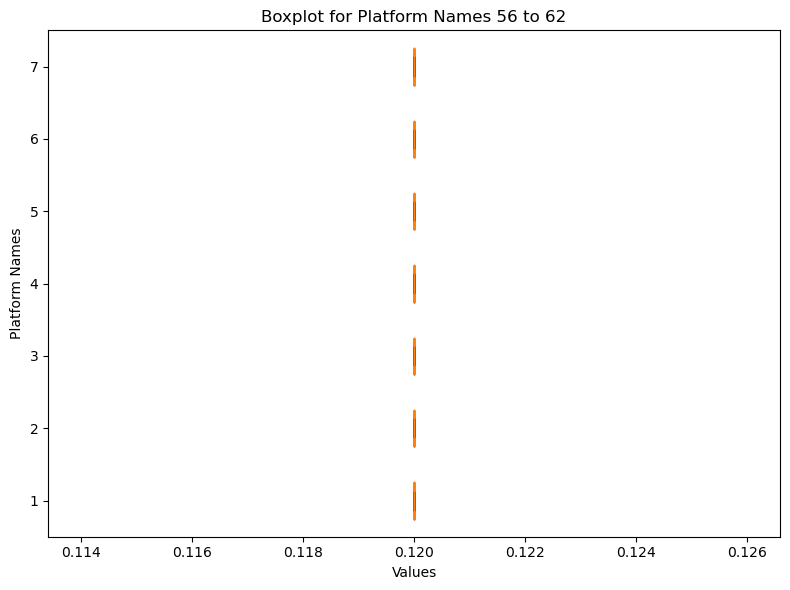

In [112]:
#plotting
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, vert=False)
plt.title(f'Boxplot for Platform Names {start+1} to {end}')
plt.xlabel('Values')
plt.ylabel('Platform Names')
#plt.yticks(range(1, len(subset_platforms) + 1), subset_platforms)  # Customizing y-axis ticks
plt.tight_layout()
plt.show()

# Using Barplot/BarChart

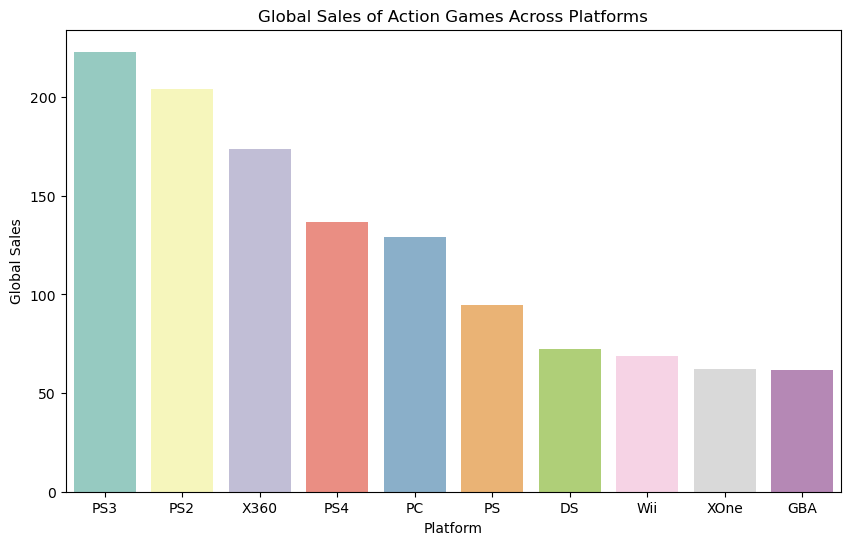

In [113]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create boxplot to compare the distribution of "Global_Sales" for that genre across platforms.
sb.barplot(x='Platform', y='Global_Sales', data=genre_sales_top10, palette='Set3')
plt.title(f'Global Sales of {Target_genre} Games Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales')

# Display the plot
plt.show()

# Sales Prediction:
Explore building a simple linear regression model (using libraries like scikit-learn) to predict "Global_Sales" based on "Critic Score" and "User Score".

Evaluate the model's performance and visualize the results.


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
#Load Data
VG_data = VGS_data
VG_data

#Select my features : "Critic Score" and "User Score" AND my Target Variable "Global_Sales"
X = VG_data[['Critic_Score', 'User_Score']]
Y = VG_data['Global_Sales']

# Train/Test dataset
Splitting my dataset into train and test

In [116]:
# Split data into training and testing sets to evaluate the model's performance
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set:',X_train.shape,Y_train.shape)
print('Test set:',X_test.shape,Y_test.shape)

Train set: (44633, 2) (44633,)
Test set: (11159, 2) (11159,)


# Create and Train the Simple Linear Regression Model

In [117]:
#Apply a linear regression model from scikit-learn and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Evaluate the Model:
After training the model, evaluate its performance using metrics such as Mean Squared Error (MSE) and R-squared score on the test set:

In [118]:
# Predict on the test set 
y_pred = model.predict(X_test)
y_pred

array([-0.47523172,  0.37291654,  0.39618996, ...,  0.20777446,
        0.20777446,  0.33731012])

In [119]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')


Mean Squared Error (MSE): 0.26
R-squared (R²): 0.01


# Findings:
MSE of 0.26 means that on average, the squared difference between the predicted values and the actual values is 0.26.(i.e moderate level of average squared error)          

An R-squared of 0.01 means that the model explains only 1% of the variance in the target variable.(i.e Implying that the model does not fit the data well and its predictions are not significantly better than just using the mean of the target variable).

In other words, the model's predictions are not very accurate or meaningful, as it explains very little of the variability in the data.

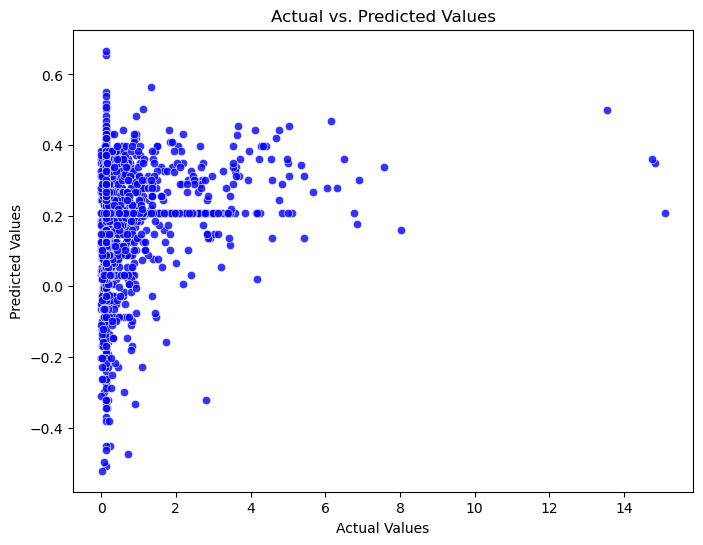

In [120]:
plt.figure(figsize=(8, 6))
sb.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.8)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Learning some visualization technique 
For scatterplot using plotly
- fig = go.Figure() - this line of code does the same thing as plt.figure(figsize=(10, 6)), plot display size
- fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual vs. Predicted',
                         marker=dict(color='blue', size=10, opacity=0.8))) - This creates a scatter plot using Plotly, where `y_test` values are plotted against `y_pred` values, with markers colored blue, sized 10, and opacity set to 0.8, labeled "Actual vs. Predicted" in the legend. 
- fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                         mode='lines', line=dict(color='black', width=2, dash='dash'),
                         name='Ideal Line')) - The code creates a dashed black line using Plotly (`go.Scatter`) representing the ideal scenario where actual (`y_test`) equals predicted values (`y_pred`), visually comparing model performance against perfect predictions.

In [121]:
import plotly.graph_objects as go
# Create a scatter plot of actual vs. predicted global sales
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual vs. Predicted',
                         marker=dict(color='blue', size=10, opacity=0.8)))

fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                         mode='lines', line=dict(color='black', width=2, dash='dash'),
                         name='Ideal Line'))

fig.update_layout(title='Actual vs. Predicted Global Sales',
                  xaxis_title='Actual Global Sales',
                  yaxis_title='Predicted Global Sales')

fig.show()


# Interactive Visualization (Bonus)

Utilize libraries like Plotly or Bokeh to create interactive visualizations that allow users to explore the data dynamically (e.g., filtering by genre, platform, or year).

In [78]:
import plotly.express as px
# Create interactive boxplot with plotly
fig = px.box(genre_sales_top10, x='Platform', y='Global_Sales', title=f'Global Sales of {Target_genre} Games Across Platforms',
             labels={'Platform': 'Platform', 'Global_Sales': 'Global Sales'})

# Customize hover behavior and appearance
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

# Update layout for better appearance
fig.update_layout(
    title=f'Global Sales of {Target_genre} Games Across Platforms',
    xaxis_title='Platform',
    yaxis_title='Global Sales',
    xaxis=dict(categoryorder='total descending'),  # Order platforms by total sales
    yaxis=dict(type='log')  # Logarithmic scale for y-axis
)

# Showplot
fig.show()